In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

2023-07-20 19:25:09.925493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import tensorflow as tf

In [2]:
train_ds=keras.utils.image_dataset_from_directory(
    directory="train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150),
)



Found 204 files belonging to 2 classes.
Found 48 files belonging to 2 classes.


In [3]:
def preprocess(image , label):
    image = tf.cast(image/255. , tf.float32)
    return image , label

In [6]:
train_ds=train_ds.map(preprocess)
test_ds=test_ds.map(preprocess)


In [7]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [8]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [12]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10


2023-07-20 19:26:42.814784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [204]
	 [[{{node Placeholder/_4}}]]
2023-07-20 19:26:42.815417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [204]
	 [[{{node Placeholder/_4}}]]


7/7 [==============================] - ETA: 0s - loss: 63.1350 - accuracy: 0.4902

2023-07-20 19:27:19.012800: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [48]
	 [[{{node Placeholder/_0}}]]
2023-07-20 19:27:19.013494: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [48]
	 [[{{node Placeholder/_0}}]]


7/7 [==============================] - 45s 6s/step - loss: 63.1350 - accuracy: 0.4902 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 53s 8s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 50s 7s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 36s 5s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 35s 5s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 37s 5s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 40s 6s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
7/7 [============================

In [16]:
import cv2

In [17]:
testimage1=cv2.imread("dogTest.jpg")
testimage1=cv2.resize(testimage1, (150,150))
testimage1_input=testimage1.reshape((1,150,150,3))

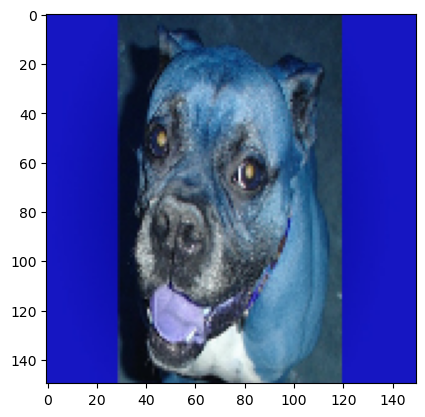

In [18]:
plt.imshow(testimage1)

In [19]:
testimage2=cv2.imread("catTest.jpg")
testimage2=cv2.resize(testimage2, (150,150))
testimage2_input=testimage2.reshape((1,150,150,3))

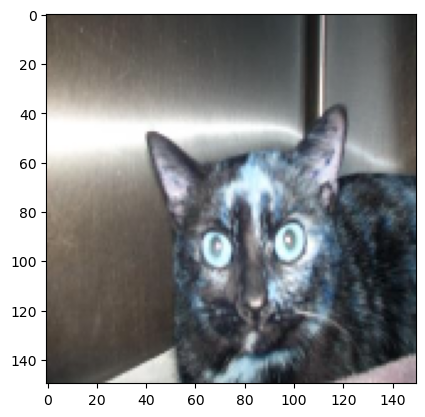

In [20]:
plt.imshow(testimage2)

In [24]:
print(model.predict(testimage1_input))
print(model.predict(testimage2_input))


1/1 [==============================] - 0s 174ms/step
[[0.5007396]]
1/1 [==============================] - 0s 190ms/step
[[0.5007396]]
